## This notebook should demonstrate functioning of Electrification score system
Because this is only demonstrator it does not work with real data.
Also instead of datetimes it only work with timeline where starting point = 0  
Delay is always >= 0 even when car arrives before time specified by agenda.  
Duration is always >= 0 and > delay  
bev actions and icev actions must contain same amount of (matching) activities  
Sum of values of subscores should always be equal to 100 (if it is not it will be reweighted)

In [211]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import score_demonstration as sc
import matplotlib.pyplot as plt

In [213]:
bev_actions = [{'type':'DRIVE', 'duration':50, 'kwh':6, 'km':80},
               {'type':'ACTIVITY', 'delay':5, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'kwh':7, 'km':80},
               {'type':'ACTIVITY', 'delay':10, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'kwh':7, 'km':80},
               {'type':'ACTIVITY', 'delay':10, 'duration':5},
               {'type':'DRIVE', 'duration':150, 'kwh':20, 'km':180},
               {'type':'ACTIVITY', 'delay':30, 'duration':5}
               ]
icev_actions = [{'type':'DRIVE', 'duration':45, 'km':80},
               {'type':'ACTIVITY', 'delay':0, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'km':80},
               {'type':'ACTIVITY', 'delay':5, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'km':80},
               {'type':'ACTIVITY', 'delay':5, 'duration':5},
               {'type':'DRIVE', 'duration':120, 'km':200},
               {'type':'ACTIVITY', 'delay':0, 'duration':5}
               ]
icev_per100_consumption = 9
icev_perliter_pol = 2310
bev_perkwh_pol = 780
kwh_price = 3
liter_gas_price = 30
values = {'time':45, 'delay':30, 'price':15, 'green':10}

In [214]:
score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
print('{} out of 100'.format(score))
for k in values.keys():
    print('{} score is {} out of {}'.format(k,subscores[k], values[k]))

75.48530201191684 out of 100
time score is 39.473684210526315 out of 45
delay score is 15.9375 out of 30
price score is 13.484848484848484 out of 15
green score is 6.589269316542044 out of 10


### Graphs for the bachelor thesis

In [215]:
# preset values
bev_actions = [{'type':'DRIVE', 'duration':50, 'kwh':0, 'km':0},
               {'type':'ACTIVITY', 'delay':0, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'kwh':3, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':5},
               {'type':'DRIVE', 'duration':500, 'kwh':4, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]
icev_actions = [{'type':'DRIVE', 'duration':50, 'km':0},
               {'type':'ACTIVITY', 'delay':0, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':5},
               {'type':'DRIVE', 'duration':50, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]
icev_per100_consumption = 9
icev_perliter_pol = 2310
bev_perkwh_pol = 780
kwh_price = 3
liter_gas_price = 30
values = {'time':45, 'delay':30, 'price':15, 'green':10}

In [216]:
values = {'time':0, 'delay':0, 'price':50, 'green':50}
pricesbs = []
greensbs = []
for i in range(0, 101):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[0]['km'] += 1
    bev_actions[0]['kwh'] += 1/7
    greensbs.append(subscores['green']*2)
    pricesbs.append(subscores['price']*2)

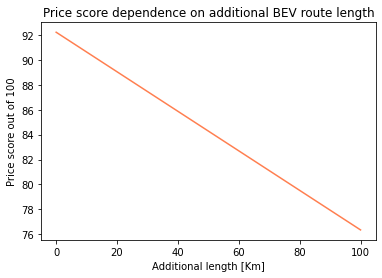

In [217]:
plt.plot(range(0,101), pricesbs, 'coral')
plt.title('Price score dependence on additional BEV route length')
plt.xlabel("Additional length [Km]")
plt.ylabel("Price score out of 100")
plt.savefig('price_score.eps', format='eps')
plt.show()
plt.plot(range(0,101), greensbs, 'lime')
plt.title('Green score dependence on additional BEV route length')
plt.xlabel("Additional length [Km]")
plt.ylabel("Green score out of 100")
plt.savefig('green_score.eps', format='eps')

In [218]:
bev_actions = [{'type':'DRIVE', 'duration':1, 'kwh':0, 'km':0},
               {'type':'ACTIVITY', 'delay':0, 'duration':49},
               {'type':'DRIVE', 'duration':49, 'kwh':3, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':50, 'kwh':4, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]
icev_actions = [{'type':'DRIVE', 'duration':1, 'km':0},
               {'type':'ACTIVITY', 'delay':0, 'duration':49},
               {'type':'DRIVE', 'duration':49, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':50, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]
icev_per100_consumption = 9
icev_perliter_pol = 2310
bev_perkwh_pol = 780
kwh_price = 3
liter_gas_price = 30
values = {'time':45, 'delay':30, 'price':15, 'green':10}

In [219]:
values = {'time':100, 'delay':0, 'price':0, 'green':0}
timesbs = []
for i in range(0, 201):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[0]['duration'] += 1
    timesbs.append(subscores['time'])

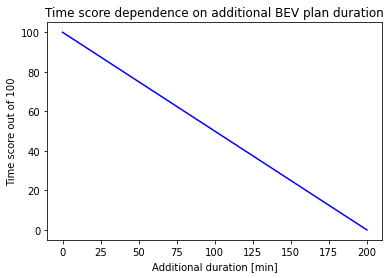

In [220]:
plt.plot(range(0,201), timesbs, 'b')
plt.title('Time score dependence on additional BEV plan duration')
plt.xlabel("Additional duration [min]")
plt.ylabel("Time score out of 100")
plt.savefig('time_score.eps', format='eps')
plt.show()

In [221]:
bev_actions = [{'type':'DRIVE', 'duration':300, 'kwh':1, 'km':1},
               {'type':'ACTIVITY', 'delay':0, 'duration':49},
               # {'type':'DRIVE', 'duration':100, 'kwh':3, 'km':50},
               # {'type':'ACTIVITY', 'delay':0, 'duration':50},
               # {'type':'DRIVE', 'duration':100, 'kwh':4, 'km':50},
               # {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]
icev_actions = [{'type':'DRIVE', 'duration':300, 'km':1},
               {'type':'ACTIVITY', 'delay':0, 'duration':49},
               # {'type':'DRIVE', 'duration':100, 'km':50},
               # {'type':'ACTIVITY', 'delay':0, 'duration':50},
               # {'type':'DRIVE', 'duration':100, 'km':50},
               # {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]

In [222]:
values = {'time':0, 'delay':100, 'price':0, 'green':0}
delaysinglesbs = []
for i in range(0, 301):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    delaysinglesbs.append(subscores['delay'])

In [223]:
plt.plot(range(0,301), delaysinglesbs, 'b')
plt.title('Delay score dependence on single activity arrival delay')
plt.xlabel("Arrival delay [min]")
plt.ylabel("Delay score out of 100")
plt.savefig('delay_single_score.eps', format='eps')
plt.show()

In [224]:
bev_actions = [{'type':'DRIVE', 'duration':100, 'kwh':1, 'km':1},
               {'type':'ACTIVITY', 'delay':0, 'duration':49},
               {'type':'DRIVE', 'duration':100, 'kwh':3, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':4, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]
icev_actions = [{'type':'DRIVE', 'duration':100, 'km':1},
               {'type':'ACTIVITY', 'delay':0, 'duration':49},
               {'type':'DRIVE', 'duration':100, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':50},
               {'type':'ACTIVITY', 'delay':0, 'duration':1},
               ]

In [225]:
values = {'time':0, 'delay':100, 'price':0, 'green':0}
delaymultisbs = []
pos = [1,3,5]
for i in range(0, 301):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    # print(i%3)
    # print(pos[i%3])
    # print('---')
    bev_actions[pos[1]]['delay'] += 1/3
    bev_actions[3]['delay'] += 1/3
    bev_actions[5]['delay'] += 1/3
    delaymultisbs.append(subscores['delay'])

In [226]:
plt.plot(range(0,301), delaymultisbs, 'b')
plt.title('Delay score dependence on sum of activities arrival delays')
plt.xlabel("Total arrival delay [min]")
plt.ylabel("Delay score out of 100")
plt.savefig('delay_multi_score.eps', format='eps')
plt.show()

In [227]:
rng = [float(x)/3 for x in range(0,301)]
#print(rng)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


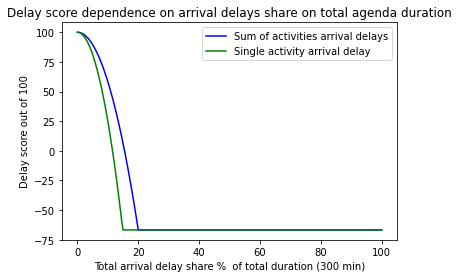

In [228]:
plt.plot(rng, delaymultisbs, 'b')
plt.plot(rng, delaysinglesbs, 'g')
plt.title('Delay score dependence on arrival delays share on total agenda duration')
plt.xlabel("Total arrival delay share %  of total duration (300 min)")
plt.ylabel("Delay score out of 100")
plt.legend(["Sum of activities arrival delays", "Single activity arrival delay"])
plt.savefig('final_graphs/delay_share_of300_score.eps', format='eps')

In [229]:
bev_actions_puv = [{'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
icev_actions_puv = [{'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
max_lim_range = 201

In [230]:
values = {'time':45, 'delay':30, 'price':15, 'green':10}
bev_actions = bev_actions_puv.copy()
icev_actions = icev_actions_puv.copy()
scoresf = []
delaysbsf = []
pricesbsf = []
greensbsf = []
timesbsf = []
for i in range(0, max_lim_range):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    bev_actions[0]['duration'] +=1
    bev_actions[0]['km'] +=1
    bev_actions[0]['kwh'] += 13/100
    delaysbsf.append(subscores['delay'])
    pricesbsf.append(subscores['price'])
    timesbsf.append(subscores['time'])
    greensbsf.append(subscores['green'])
    scoresf.append(score)

In [231]:
values = {'time':45, 'delay':30, 'price':15, 'green':10}
bev_actions_puv = [{'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
icev_actions_puv = [{'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]

In [232]:
bev_actions = bev_actions_puv.copy()
icev_actions = icev_actions_puv.copy()
scoresf2 = []
delaysbsf2 = []
pricesbsf2 = []
greensbsf2 = []
timesbsf2 = []
for i in range(0, max_lim_range):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    bev_actions[3]['delay'] += 1
    bev_actions[0]['duration'] +=1
    bev_actions[0]['km'] +=1
    bev_actions[0]['kwh'] += 13/100
    delaysbsf2.append(subscores['delay'])
    pricesbsf2.append(subscores['price'])
    timesbsf2.append(subscores['time'])
    greensbsf2.append(subscores['green'])
    scoresf2.append(score)

In [233]:
values = {'time':45, 'delay':30, 'price':15, 'green':10}
bev_actions_puv = [{'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'kwh':13, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]
icev_actions_puv = [{'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               {'type':'DRIVE', 'duration':100, 'km':100},
               {'type':'ACTIVITY', 'delay':0, 'duration':50},
               ]

In [234]:
bev_actions = bev_actions_puv.copy()
icev_actions = icev_actions_puv.copy()
scoresf3 = []
delaysbsf3 = []
pricesbsf3 = []
greensbsf3 = []
timesbsf3 = []
for i in range(0, max_lim_range):
    score, subscores = sc.getScore(bev_actions, icev_actions,icev_per100_consumption,icev_perliter_pol,bev_perkwh_pol, kwh_price, liter_gas_price, values)
    bev_actions[1]['delay'] += 1
    bev_actions[3]['delay'] += 1
    bev_actions[5]['delay'] += 1
    bev_actions[0]['duration'] +=1
    bev_actions[0]['km'] +=1
    bev_actions[0]['kwh'] += 13/100
    delaysbsf3.append(subscores['delay'])
    pricesbsf3.append(subscores['price'])
    timesbsf3.append(subscores['time'])
    greensbsf3.append(subscores['green'])
    scoresf3.append(score)

In [235]:
plt.plot(range(0,max_lim_range), delaysbsf, 'b')
plt.plot(range(0,max_lim_range), delaysbsf2, 'g')
plt.plot(range(0,max_lim_range), delaysbsf3, 'r')
plt.yticks(range(-25,36, 5))
plt.ylim([-26,36])
plt.title('Delay scores comparison based on delay "transfering"')
plt.xlabel("Additional length [km]")
plt.ylabel("Delay score points out of 30")
plt.legend(["Only first activity delayed", "First and second activity delayed", "All activities delayed"])
plt.savefig('final_graphs/delay_score_transfering.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


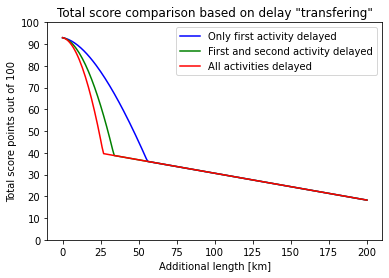

In [236]:
plt.plot(range(0,max_lim_range), scoresf, 'b')
plt.plot(range(0,max_lim_range), scoresf2, 'g')
plt.plot(range(0,max_lim_range), scoresf3, 'r')
plt.ylim([0,100])
plt.yticks(range(0,101, 10))
plt.title('Total score comparison based on delay "transfering"')
plt.xlabel("Additional length [km]")
plt.ylabel("Total score points out of 100")
plt.legend(["Only first activity delayed", "First and second activity delayed", "All activities delayed"])
plt.savefig('final_graphs/total_score_transfering.eps', format='eps')

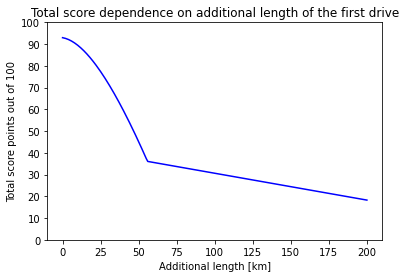

In [237]:
plt.plot(range(0,max_lim_range), scoresf, 'b')
plt.ylim([0,100])
plt.yticks(range(0,101, 10))
plt.title('Total score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Total score points out of 100")
plt.savefig('final_graphs/total_score.eps', format='eps')

In [238]:
plt.plot(range(0,max_lim_range), greensbsf, 'b')
plt.ylim([0,10])
plt.yticks(range(0,11))
plt.title('Green score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Green score points out of 10")
plt.savefig('final_graphs/green_score.eps', format='eps')

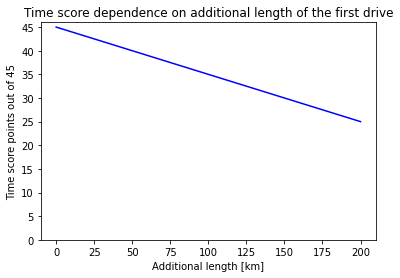

In [239]:
plt.plot(range(0,max_lim_range), timesbsf, 'b')
plt.ylim([0,46])
plt.yticks(range(0,46, 5))
plt.title('Time score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Time score points out of 45")
plt.savefig('final_graphs/time_score.eps', format='eps')

In [240]:
plt.plot(range(0,max_lim_range), pricesbsf, 'b')
plt.ylim([0,15])
plt.yticks(range(0,15))
plt.title('Price score dependence on additional length of the first drive')
plt.xlabel("Additional length [km]")
plt.ylabel("Price score points out of 15")
plt.savefig('final_graphs/price_score.eps', format='eps')